In [1]:
import requests
import re
import numpy as np
r = requests.get('http://map.amap.com/service/subway?_1469083453978&srhdata=1100_drw_beijing.json')

In [2]:
def get_lines_stations_info(text):
    # 遍历text格式数据，组成地点数据结构
    # 所有线路信息的dict：key：线路名称；value：站点名称list
    lines_info = {}
    # 所有站点信息的dict：key：站点名称；value：站点坐标(x,y)
    stations_info = {}
    pattern1=re.compile(r'"ln":"(.*?)"')
    result1=pattern1.findall(r.text)
    pattern2=re.compile(r'st":(.*?)"li"')
    result2=pattern2.findall(r.text)
    pattern3=re.compile(r'"n":"(.*?)"')
    result3=[]
    for i in result2:
        result=pattern3.findall(i)
        result3.append(result)  
    lines_info=dict(zip(result1,result3))
    #站点信息 dict： key：站点名称 ，values：站点坐标
    pattern11=re.compile(r'"n":"(.*?)".*?"sl":"(.*?),(.*?)","udli"')
    station_info3=pattern11.findall(r.text)
    pattern11=re.compile(r'sl":"(\d*.\d*),(\d*.\d*)","udli"')
    station_info2=pattern11.findall(r.text)
    for i in range(len(station_info2)):
        c=map(float,station_info2[i])
        station_info2[i]=tuple(c)   
    #站点信息 dict： key：站点名称 ，values：站点坐标
    pattern11=re.compile(r'"n":"(.*?)","sid"')
    station_info1=pattern11.findall(r.text)
    #站点信息 dict： key：站点名称 ，values：站点坐标
    stations_info=dict(zip(station_info1,station_info2))
    return lines_info,stations_info
lines_info, stations_info = get_lines_stations_info(r.text)
#lines_info
#stations_info

In [3]:
# 根据线路信息，建立站点邻接表dict
def get_neighbor_info(lines_info):
    #每个线路遍历一遍，先取每个站点，建成一个空values的字典
    dict_station={}#所有站点信息
    for i in lines_info:
        for k in lines_info[i]:
            dict_station[k]=[]
    #print(dict_station)#打印所有站点名称
    def add_neighbor_dict(str1,line_info):
        if str1==line_info[0] and str1!=line_info[-1]:
            dict_station[str1].append(line_info[1])
        elif str1==line_info[-1]:
            dict_station[str1].append(line_info[-2])
        elif line_info[0]!=line_info[-1]:
            p=line_info.index(str1)
            dict_station[str1].append(line_info[p-1])
            dict_station[str1].append(line_info[p+1]) 
    for station_key in dict_station:  
        for i in lines_info:
            for k in lines_info[i]:
                if k==station_key:
                    add_neighbor_dict(station_key,lines_info[i])            
    return dict_station
neighbor_info=get_neighbor_info(lines_info)
#增加两条环线的首尾
neighbor_info['火器营'].append('巴沟')
neighbor_info['巴沟'].append('火器营')
neighbor_info['积水潭'].append('西直门')
neighbor_info['西直门'].append('积水潭')
#neighbor_info

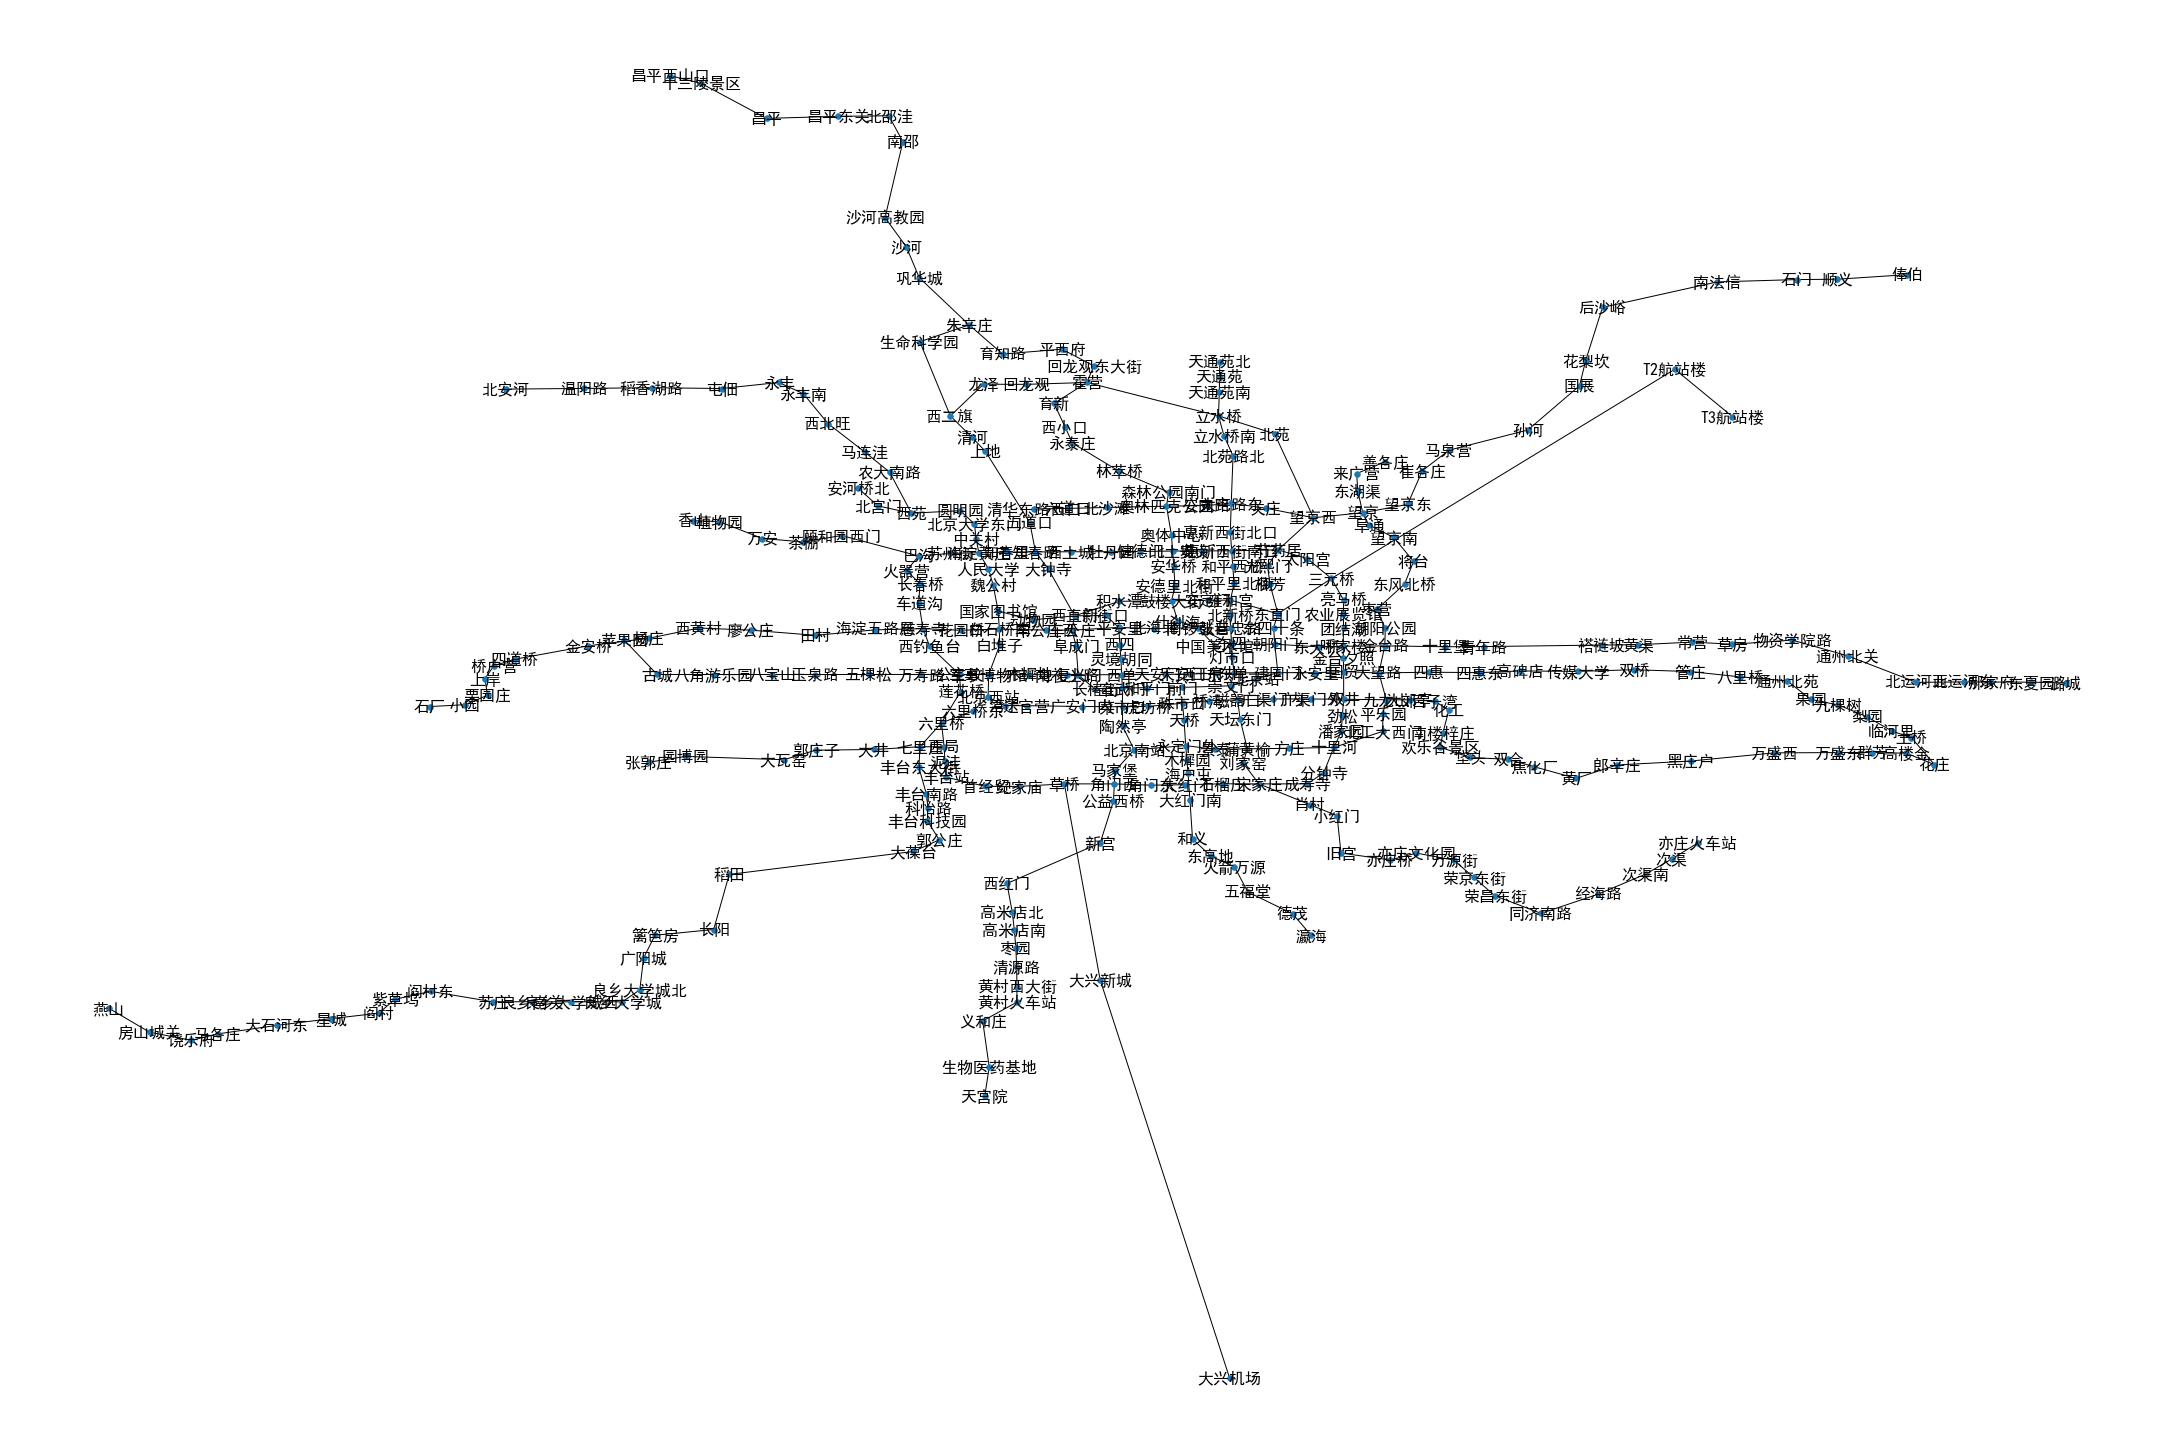

In [6]:
#画出地铁线路图
import networkx as nx
import matplotlib.pyplot as plt
from pylab import mpl
plt.figure(figsize=(30, 20))
mpl.rcParams['font.sans-serif'] = ['SimHei']
station_graph = nx.Graph(neighbor_info)
station_graph.add_nodes_from(list(stations_info.keys()))
nx.draw(station_graph, stations_info, with_labels=True,font_size=16, node_size=30)